<a href="https://colab.research.google.com/github/PARULCHUTANIPC/YOLO/blob/YOLO-V8/YOLO_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.2/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd /content/drive/MyDrive/data harsh

/content/drive/MyDrive/data harsh


In [ ]:
!pwd

/content/drive/MyDrive/data harsh


# Training on Custom Dataset

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data= data.yaml epochs=5 imgsz=224 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=data.yaml, epochs=5, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4

In [ ]:
%cd /content/drive/MyDrive/data harsh

/content/drive/MyDrive/data harsh


In [ ]:
!pwd

/content/drive/MyDrive/data harsh


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train4/weights/best.pt source="/content/car2.jpg" save=True

2023-04-17 11:50:34.546699: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 11:50:35.379976: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
image 1/1 /content/car2.jpg: 160x224 62.7ms
Speed: 0.5ms pre-process, 62.7ms inference, 14.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict3


In [ ]:
import glob
from IPython.display import Image, display

SyntaxError: ignored

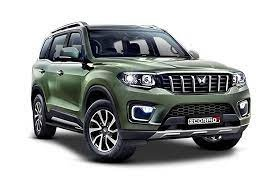

In [ ]:
for image_path in glob.glob(f'/content/drive/MyDrive/data harsh/runs/detect/predict/*.jpg')[:3]:
  display(Image(filename = image_path, height = 600))


In [ ]:
z = !yolo task=detect mode=predict model=runs/detect/train4/weights/best.pt source="/content/car2.jpg"

In [ ]:
z

['2023-04-17 11:57:34.008870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.',
 'To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.',
 '2023-04-17 11:57:34.830404: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT',
 'Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)',
 'Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs',
 'image 1/1 /content/car2.jpg: 160x224 55.6ms',
 'Speed: 0.3ms pre-process, 55.6ms inference, 10.6ms postprocess per image at shape (1, 3, 224, 224)']

In [ ]:
z1 = z[6]

In [ ]:
start = int(z1.index('('))+1
end = z1.index(')')
start, end

(83, 97)

In [ ]:
z2 = z1[start:end].split(',')
z2

['1', ' 3', ' 224', ' 224']

In [ ]:
from PIL import Image, ImageDraw
image = Image.open('/content/car2.jpg')

1 224 4 224


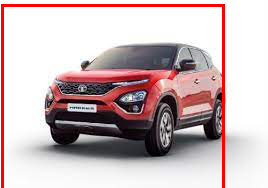

In [ ]:
draw = ImageDraw.Draw(image)

x1 = int(z2[0])
x2 = int(z2[2])
y1 = int(z2[1])+x1
y2 = int(z2[3].split(')')[0])
print(x1,x2,y1,y2)
draw.rectangle((x1, y1, x2, y2), outline='red', width=3)

image.show()